# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

#helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

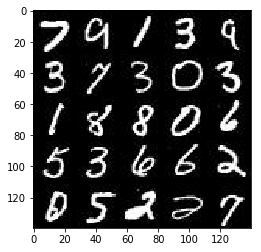

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

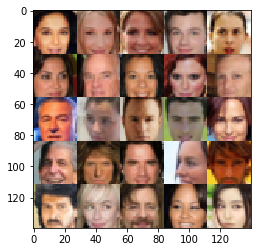

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
#TO test

    # TODO: Implement Function
    tensah = tf.placeholder(tf.float32, (None,image_width,image_height,image_channels),name='tensah') 
    zdata = tf.placeholder(tf.float32, (None,z_dim),name='zdata')
    learnrate = tf.placeholder(tf.float32, None, name="learnrate")
    return tensah, zdata, learnrate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [107]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    keep_prob = 0.5
    
    def leaky_relu(x, alpha=0.1, name='leaky_relu'):
        return tf.maximum(x, alpha * x, name=name)
    
    with tf.variable_scope('discriminator', reuse=reuse):
        #32x32x3
        l1 = tf.layers.conv2d(images, 64, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(),padding='same')
        relu1 = leaky_relu(l1)
       # relu1 = tf.nn.dropout(relu1, keep_prob)
        
        # 16x16x32
        l2 = tf.layers.conv2d(relu1, 128, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        batchnorm = tf.layers.batch_normalization(l2, training=True)
        relu2 = leaky_relu(batchnorm)
        #relu2 = tf.nn.dropout(relu2, keep_prob)
        
        # 8x8x128
        l3 = tf.layers.conv2d(relu2, 256, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        batchnorm2 = tf.layers.batch_normalization(l3, training=True)
        relu3 = leaky_relu(batchnorm2)
        #relu3 = tf.nn.dropout(relu3, keep_prob)
        

        # 4x4x256
        rs = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(rs, 1)
        logits = tf.nn.dropout(logits,keep_prob)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [127]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1 #increased size thanks to reviewer's recommendation
    kp = 0.9
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        layer1 = tf.layers.dense(z, 2*2*512, activation=None)

        layer1 = tf.reshape(layer1, (-1, 2, 2, 512))
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
       # layer1 = tf.nn.dropout(layer1, keep_prob=kp)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 5, strides=2, padding='valid')
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
       # layer2 = tf.nn.dropout(layer2, keep_prob=kp)
        
        layer3 = tf.layers.conv2d_transpose(layer2, 128, 5, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)
        layer3 = tf.nn.dropout(layer3, keep_prob=kp)
        
        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, 5, strides=2, padding='same')

        
        
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [122]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [123]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    trainvars = tf.trainable_variables()
    disvars = [var for var in trainvars if var.name.startswith('discriminator')]
    genvars = [var for var in trainvars if var.name.startswith('generator')]
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = disvars)

    with tf.control_dependencies(g_update_ops):
        g_train = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = genvars)

    return d_train, g_train


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [124]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [125]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr_placeholder = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    steps = 0
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    n_images = 25
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images = batch_images*2  #done per reviewer's suggestion         
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_placeholder: learning_rate, input_real: batch_images})
                #run twice per reviewer's suggestion, yielded far better performance from the generator.
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_placeholder: learning_rate, input_real: batch_images})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_placeholder: learning_rate, input_real: batch_images})

                if steps % 25 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.9089... Generator Loss: 0.3517
Epoch 1/2... Discriminator Loss: 1.8454... Generator Loss: 0.3668
Epoch 1/2... Discriminator Loss: 1.4721... Generator Loss: 0.6281
Epoch 1/2... Discriminator Loss: 1.5701... Generator Loss: 0.5741


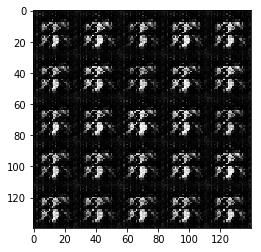

Epoch 1/2... Discriminator Loss: 1.5243... Generator Loss: 1.0565
Epoch 1/2... Discriminator Loss: 1.4500... Generator Loss: 0.6519
Epoch 1/2... Discriminator Loss: 1.1949... Generator Loss: 0.6820
Epoch 1/2... Discriminator Loss: 1.3361... Generator Loss: 0.5453


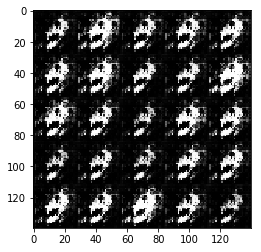

Epoch 1/2... Discriminator Loss: 1.2881... Generator Loss: 0.9607
Epoch 1/2... Discriminator Loss: 1.1059... Generator Loss: 0.7586
Epoch 1/2... Discriminator Loss: 1.3005... Generator Loss: 1.0020
Epoch 1/2... Discriminator Loss: 1.8455... Generator Loss: 0.6628


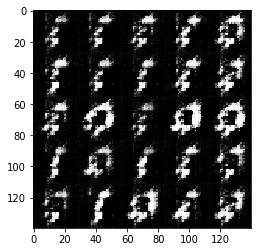

Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.8358
Epoch 1/2... Discriminator Loss: 1.1963... Generator Loss: 0.9387
Epoch 1/2... Discriminator Loss: 1.6492... Generator Loss: 0.5216
Epoch 1/2... Discriminator Loss: 1.5267... Generator Loss: 0.6698


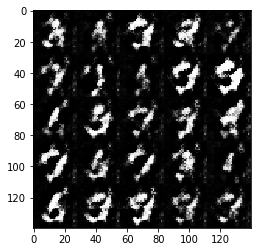

Epoch 1/2... Discriminator Loss: 1.4318... Generator Loss: 0.4772
Epoch 1/2... Discriminator Loss: 1.3188... Generator Loss: 0.7534
Epoch 1/2... Discriminator Loss: 1.3517... Generator Loss: 0.6591
Epoch 1/2... Discriminator Loss: 1.3133... Generator Loss: 0.7021


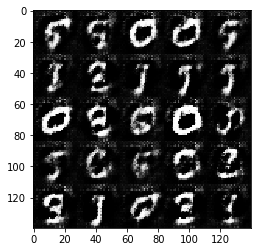

Epoch 1/2... Discriminator Loss: 1.3656... Generator Loss: 0.7074
Epoch 1/2... Discriminator Loss: 1.5186... Generator Loss: 0.6166
Epoch 1/2... Discriminator Loss: 1.5132... Generator Loss: 0.7642
Epoch 1/2... Discriminator Loss: 1.5716... Generator Loss: 0.6869


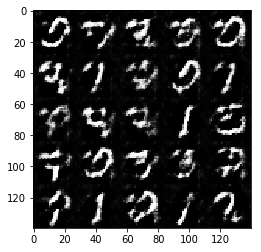

Epoch 1/2... Discriminator Loss: 1.5288... Generator Loss: 0.8064
Epoch 1/2... Discriminator Loss: 1.7555... Generator Loss: 0.8771
Epoch 1/2... Discriminator Loss: 1.5934... Generator Loss: 0.5815
Epoch 1/2... Discriminator Loss: 1.5116... Generator Loss: 0.6508


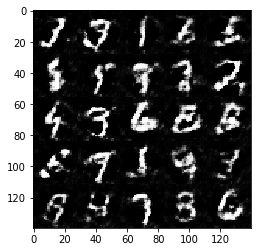

Epoch 1/2... Discriminator Loss: 1.6388... Generator Loss: 0.5797
Epoch 1/2... Discriminator Loss: 1.4076... Generator Loss: 0.7435
Epoch 1/2... Discriminator Loss: 1.5020... Generator Loss: 0.6797
Epoch 1/2... Discriminator Loss: 1.5096... Generator Loss: 0.5630


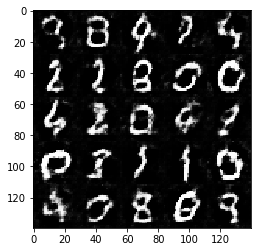

Epoch 1/2... Discriminator Loss: 1.5165... Generator Loss: 0.7000
Epoch 1/2... Discriminator Loss: 1.3979... Generator Loss: 0.7646
Epoch 1/2... Discriminator Loss: 1.4138... Generator Loss: 0.6675
Epoch 1/2... Discriminator Loss: 1.5076... Generator Loss: 0.6770


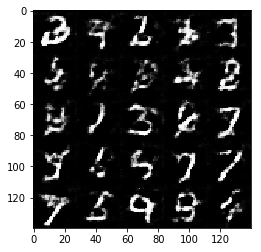

Epoch 1/2... Discriminator Loss: 1.4299... Generator Loss: 0.5881
Epoch 1/2... Discriminator Loss: 1.4874... Generator Loss: 0.7219
Epoch 1/2... Discriminator Loss: 1.4594... Generator Loss: 0.7033
Epoch 1/2... Discriminator Loss: 1.4758... Generator Loss: 0.7362


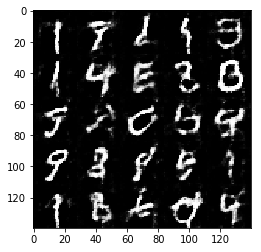

Epoch 1/2... Discriminator Loss: 1.5514... Generator Loss: 0.8104
Epoch 1/2... Discriminator Loss: 1.5461... Generator Loss: 0.5465
Epoch 1/2... Discriminator Loss: 1.4272... Generator Loss: 0.6740
Epoch 1/2... Discriminator Loss: 1.5987... Generator Loss: 0.8168


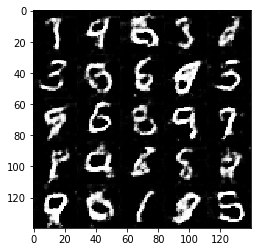

Epoch 1/2... Discriminator Loss: 1.4632... Generator Loss: 0.4901
Epoch 1/2... Discriminator Loss: 1.3678... Generator Loss: 0.6886
Epoch 1/2... Discriminator Loss: 1.4165... Generator Loss: 0.7409
Epoch 1/2... Discriminator Loss: 1.3698... Generator Loss: 0.5889


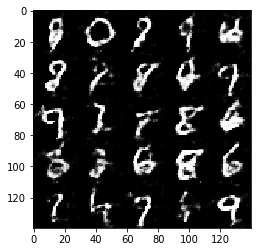

Epoch 1/2... Discriminator Loss: 1.4468... Generator Loss: 0.6249
Epoch 1/2... Discriminator Loss: 1.4266... Generator Loss: 0.6703
Epoch 1/2... Discriminator Loss: 1.5825... Generator Loss: 0.6008
Epoch 1/2... Discriminator Loss: 1.5938... Generator Loss: 0.6315


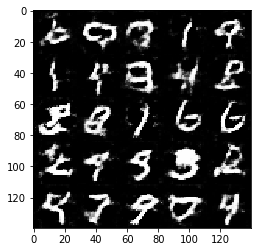

Epoch 1/2... Discriminator Loss: 1.4871... Generator Loss: 0.6479
Epoch 1/2... Discriminator Loss: 1.5350... Generator Loss: 0.5769
Epoch 1/2... Discriminator Loss: 1.5480... Generator Loss: 0.5503
Epoch 1/2... Discriminator Loss: 1.4459... Generator Loss: 0.8526


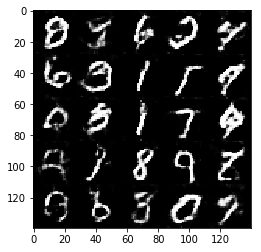

Epoch 1/2... Discriminator Loss: 1.6076... Generator Loss: 0.8096
Epoch 1/2... Discriminator Loss: 1.4248... Generator Loss: 0.6221
Epoch 1/2... Discriminator Loss: 1.5206... Generator Loss: 0.4880
Epoch 1/2... Discriminator Loss: 1.4890... Generator Loss: 0.4752


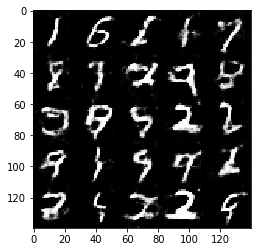

Epoch 1/2... Discriminator Loss: 1.4459... Generator Loss: 0.5604
Epoch 1/2... Discriminator Loss: 1.4679... Generator Loss: 0.5907
Epoch 1/2... Discriminator Loss: 1.5172... Generator Loss: 0.5462
Epoch 1/2... Discriminator Loss: 1.4595... Generator Loss: 0.6526


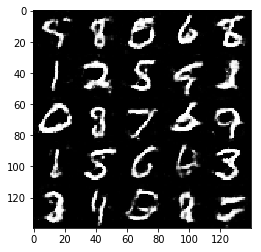

Epoch 1/2... Discriminator Loss: 1.4069... Generator Loss: 0.5830
Epoch 1/2... Discriminator Loss: 1.4822... Generator Loss: 0.7202
Epoch 1/2... Discriminator Loss: 1.6420... Generator Loss: 0.6937
Epoch 1/2... Discriminator Loss: 1.5786... Generator Loss: 0.7023


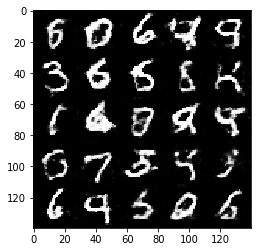

Epoch 1/2... Discriminator Loss: 1.4696... Generator Loss: 0.6357
Epoch 1/2... Discriminator Loss: 1.4224... Generator Loss: 0.7939
Epoch 1/2... Discriminator Loss: 1.6336... Generator Loss: 0.5282
Epoch 1/2... Discriminator Loss: 1.5071... Generator Loss: 0.5838


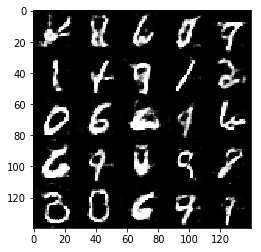

Epoch 1/2... Discriminator Loss: 1.5474... Generator Loss: 0.5355
Epoch 1/2... Discriminator Loss: 1.4606... Generator Loss: 0.4816
Epoch 1/2... Discriminator Loss: 1.4779... Generator Loss: 0.5687
Epoch 2/2... Discriminator Loss: 1.6875... Generator Loss: 0.4919


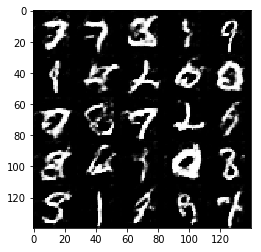

Epoch 2/2... Discriminator Loss: 1.5915... Generator Loss: 0.6034
Epoch 2/2... Discriminator Loss: 1.4691... Generator Loss: 0.5361
Epoch 2/2... Discriminator Loss: 1.4753... Generator Loss: 0.7613
Epoch 2/2... Discriminator Loss: 1.4582... Generator Loss: 0.6017


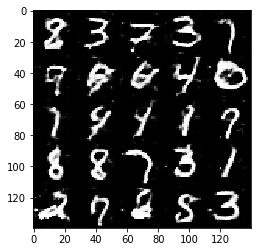

Epoch 2/2... Discriminator Loss: 1.3992... Generator Loss: 0.6529
Epoch 2/2... Discriminator Loss: 1.5284... Generator Loss: 0.6819
Epoch 2/2... Discriminator Loss: 1.5654... Generator Loss: 0.5667
Epoch 2/2... Discriminator Loss: 1.5964... Generator Loss: 0.5357


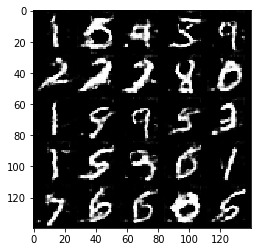

Epoch 2/2... Discriminator Loss: 1.4958... Generator Loss: 0.5798
Epoch 2/2... Discriminator Loss: 1.4179... Generator Loss: 0.5725
Epoch 2/2... Discriminator Loss: 1.4100... Generator Loss: 0.7103
Epoch 2/2... Discriminator Loss: 1.3305... Generator Loss: 0.7291


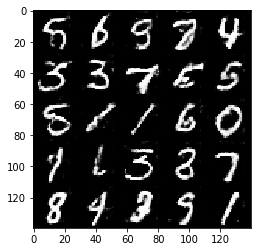

Epoch 2/2... Discriminator Loss: 1.6289... Generator Loss: 0.4626
Epoch 2/2... Discriminator Loss: 1.5138... Generator Loss: 0.5754
Epoch 2/2... Discriminator Loss: 1.5417... Generator Loss: 0.4914
Epoch 2/2... Discriminator Loss: 1.3614... Generator Loss: 0.6565


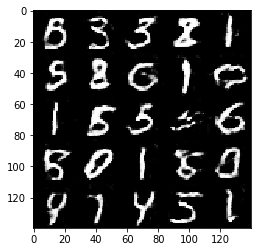

Epoch 2/2... Discriminator Loss: 1.3971... Generator Loss: 0.6905
Epoch 2/2... Discriminator Loss: 1.4127... Generator Loss: 0.4748
Epoch 2/2... Discriminator Loss: 1.4497... Generator Loss: 0.5460
Epoch 2/2... Discriminator Loss: 1.3775... Generator Loss: 0.8274


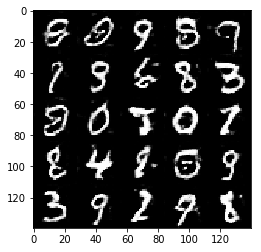

Epoch 2/2... Discriminator Loss: 1.4025... Generator Loss: 0.5734
Epoch 2/2... Discriminator Loss: 1.5176... Generator Loss: 0.7597
Epoch 2/2... Discriminator Loss: 1.4602... Generator Loss: 0.5319
Epoch 2/2... Discriminator Loss: 1.4830... Generator Loss: 0.5611


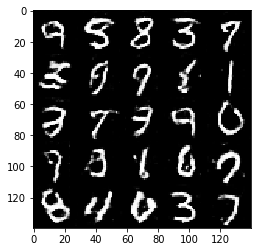

Epoch 2/2... Discriminator Loss: 1.4291... Generator Loss: 0.5614
Epoch 2/2... Discriminator Loss: 1.4276... Generator Loss: 0.6118
Epoch 2/2... Discriminator Loss: 1.4670... Generator Loss: 0.6633
Epoch 2/2... Discriminator Loss: 1.4182... Generator Loss: 0.6311


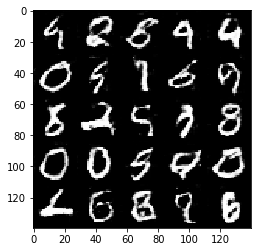

Epoch 2/2... Discriminator Loss: 1.5096... Generator Loss: 0.7101
Epoch 2/2... Discriminator Loss: 1.7683... Generator Loss: 0.6858
Epoch 2/2... Discriminator Loss: 1.8083... Generator Loss: 0.3956
Epoch 2/2... Discriminator Loss: 1.4521... Generator Loss: 0.5643


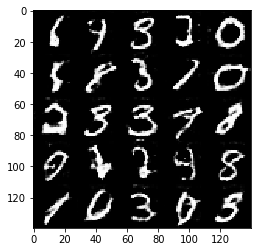

Epoch 2/2... Discriminator Loss: 1.5289... Generator Loss: 0.5451
Epoch 2/2... Discriminator Loss: 1.5044... Generator Loss: 0.7569
Epoch 2/2... Discriminator Loss: 1.4822... Generator Loss: 0.6329
Epoch 2/2... Discriminator Loss: 1.5273... Generator Loss: 0.5663


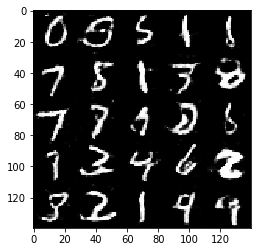

Epoch 2/2... Discriminator Loss: 2.0565... Generator Loss: 0.8401
Epoch 2/2... Discriminator Loss: 1.5946... Generator Loss: 0.7202
Epoch 2/2... Discriminator Loss: 1.3926... Generator Loss: 0.7347
Epoch 2/2... Discriminator Loss: 1.4527... Generator Loss: 0.7318


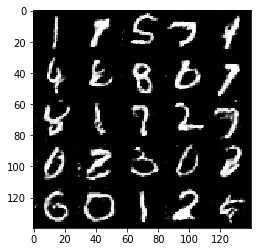

Epoch 2/2... Discriminator Loss: 2.6860... Generator Loss: 0.3627
Epoch 2/2... Discriminator Loss: 1.4570... Generator Loss: 0.5600
Epoch 2/2... Discriminator Loss: 1.7807... Generator Loss: 0.3896
Epoch 2/2... Discriminator Loss: 1.2531... Generator Loss: 0.6745


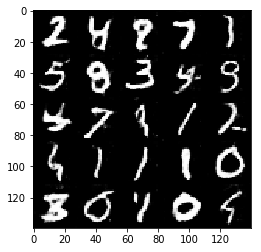

Epoch 2/2... Discriminator Loss: 1.5289... Generator Loss: 0.4236
Epoch 2/2... Discriminator Loss: 1.7903... Generator Loss: 0.5007
Epoch 2/2... Discriminator Loss: 1.7885... Generator Loss: 0.4325
Epoch 2/2... Discriminator Loss: 1.2862... Generator Loss: 0.5889


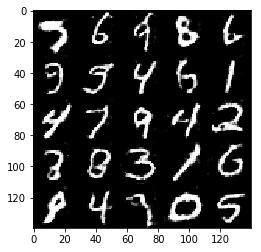

Epoch 2/2... Discriminator Loss: 1.5411... Generator Loss: 0.4880
Epoch 2/2... Discriminator Loss: 1.7295... Generator Loss: 0.4252
Epoch 2/2... Discriminator Loss: 1.3545... Generator Loss: 0.6260
Epoch 2/2... Discriminator Loss: 1.4965... Generator Loss: 0.5622


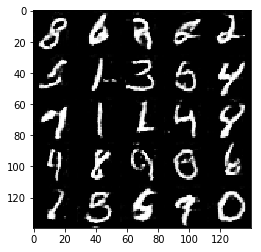

Epoch 2/2... Discriminator Loss: 1.9511... Generator Loss: 1.0675
Epoch 2/2... Discriminator Loss: 1.3024... Generator Loss: 0.5543
Epoch 2/2... Discriminator Loss: 1.4536... Generator Loss: 0.6416
Epoch 2/2... Discriminator Loss: 1.3820... Generator Loss: 0.5715


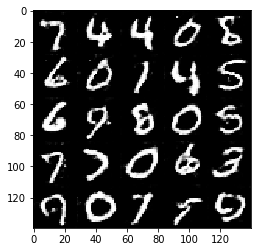

Epoch 2/2... Discriminator Loss: 1.8336... Generator Loss: 0.4975
Epoch 2/2... Discriminator Loss: 1.5387... Generator Loss: 0.5940
Epoch 2/2... Discriminator Loss: 1.4544... Generator Loss: 0.7950
Epoch 2/2... Discriminator Loss: 1.6310... Generator Loss: 0.4716


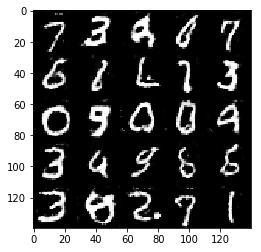

Epoch 2/2... Discriminator Loss: 1.4434... Generator Loss: 0.7803
Epoch 2/2... Discriminator Loss: 1.7193... Generator Loss: 0.4413
Epoch 2/2... Discriminator Loss: 1.8907... Generator Loss: 0.4418
Epoch 2/2... Discriminator Loss: 1.4435... Generator Loss: 0.8263


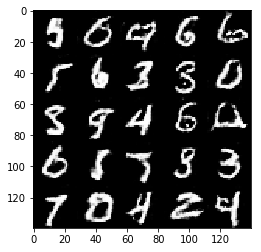

Epoch 2/2... Discriminator Loss: 1.3347... Generator Loss: 0.6530
Epoch 2/2... Discriminator Loss: 1.5990... Generator Loss: 0.5410
Epoch 2/2... Discriminator Loss: 1.3834... Generator Loss: 0.6681
Epoch 2/2... Discriminator Loss: 1.4633... Generator Loss: 0.7182


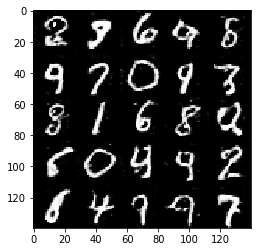

Epoch 2/2... Discriminator Loss: 1.6391... Generator Loss: 0.6012
Epoch 2/2... Discriminator Loss: 1.9133... Generator Loss: 0.4754
Epoch 2/2... Discriminator Loss: 1.5183... Generator Loss: 0.6657
Epoch 2/2... Discriminator Loss: 1.3336... Generator Loss: 0.6717


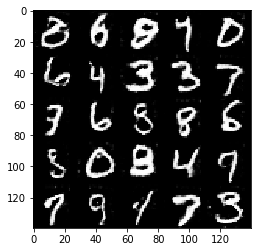

Epoch 2/2... Discriminator Loss: 1.4974... Generator Loss: 0.6479
Epoch 2/2... Discriminator Loss: 1.3538... Generator Loss: 0.6384


In [126]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.6834... Generator Loss: 0.4650
Epoch 1/1... Discriminator Loss: 2.3053... Generator Loss: 0.4519
Epoch 1/1... Discriminator Loss: 1.5372... Generator Loss: 0.8010
Epoch 1/1... Discriminator Loss: 0.9573... Generator Loss: 1.6070


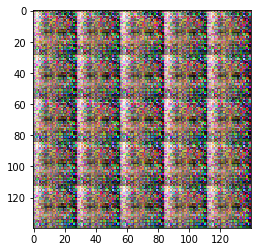

Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 1.0344
Epoch 1/1... Discriminator Loss: 1.8215... Generator Loss: 0.8765
Epoch 1/1... Discriminator Loss: 1.7001... Generator Loss: 0.6007
Epoch 1/1... Discriminator Loss: 1.7483... Generator Loss: 0.5673


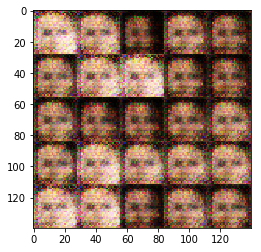

Epoch 1/1... Discriminator Loss: 1.5447... Generator Loss: 0.6380
Epoch 1/1... Discriminator Loss: 1.5309... Generator Loss: 0.7735
Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 1.9901... Generator Loss: 0.4939


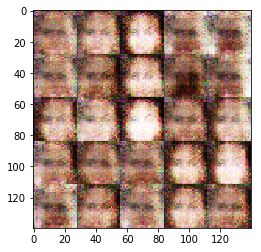

Epoch 1/1... Discriminator Loss: 1.5153... Generator Loss: 0.5811
Epoch 1/1... Discriminator Loss: 1.6717... Generator Loss: 0.6091
Epoch 1/1... Discriminator Loss: 1.4638... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.7833... Generator Loss: 0.5240


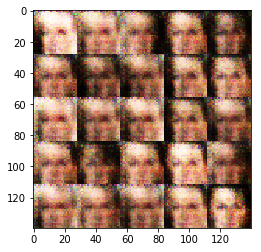

Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.6999
Epoch 1/1... Discriminator Loss: 1.4435... Generator Loss: 0.8236
Epoch 1/1... Discriminator Loss: 1.7133... Generator Loss: 0.5766
Epoch 1/1... Discriminator Loss: 1.5087... Generator Loss: 0.6726


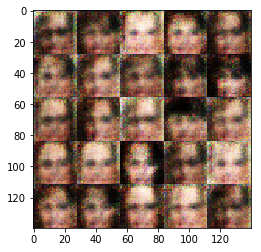

Epoch 1/1... Discriminator Loss: 1.6331... Generator Loss: 0.5895
Epoch 1/1... Discriminator Loss: 1.4633... Generator Loss: 0.6273
Epoch 1/1... Discriminator Loss: 1.5208... Generator Loss: 0.6337
Epoch 1/1... Discriminator Loss: 1.5020... Generator Loss: 0.6576


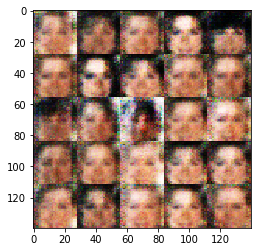

Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.5590... Generator Loss: 0.5980
Epoch 1/1... Discriminator Loss: 1.6057... Generator Loss: 0.5820
Epoch 1/1... Discriminator Loss: 1.4627... Generator Loss: 0.6091


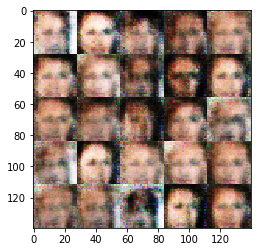

Epoch 1/1... Discriminator Loss: 1.5396... Generator Loss: 0.6091
Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.5304... Generator Loss: 0.7750
Epoch 1/1... Discriminator Loss: 1.4544... Generator Loss: 0.6602


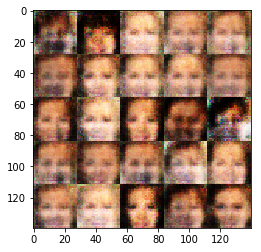

Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.4466... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.5172... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.4750... Generator Loss: 0.6605


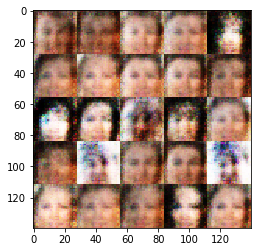

Epoch 1/1... Discriminator Loss: 1.5733... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.4320... Generator Loss: 0.6571
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.7271
Epoch 1/1... Discriminator Loss: 1.5064... Generator Loss: 0.5827


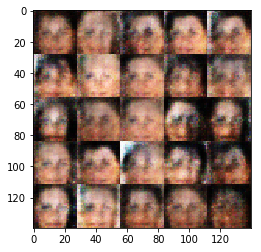

Epoch 1/1... Discriminator Loss: 1.4704... Generator Loss: 0.6727
Epoch 1/1... Discriminator Loss: 1.4485... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.4836... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.7503


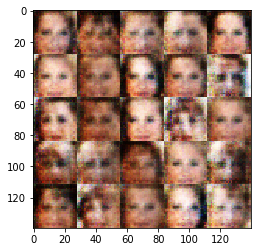

Epoch 1/1... Discriminator Loss: 1.4908... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.5061... Generator Loss: 0.6381
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.4614... Generator Loss: 0.7089


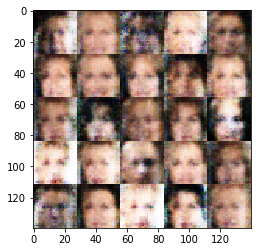

Epoch 1/1... Discriminator Loss: 1.4648... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.8214
Epoch 1/1... Discriminator Loss: 1.4977... Generator Loss: 0.7036
Epoch 1/1... Discriminator Loss: 1.4775... Generator Loss: 0.6291


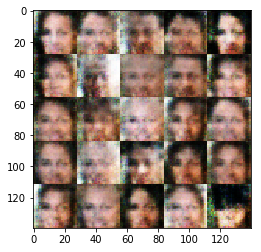

Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.7059
Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 0.6202
Epoch 1/1... Discriminator Loss: 1.4509... Generator Loss: 0.7175


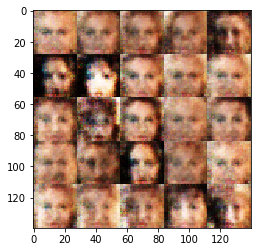

Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.4529... Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.4158... Generator Loss: 0.7415


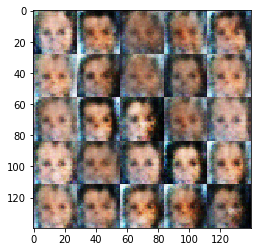

Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.7957
Epoch 1/1... Discriminator Loss: 1.5058... Generator Loss: 0.5706
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.5077... Generator Loss: 0.7501


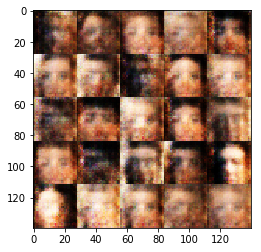

Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.4128... Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.6154
Epoch 1/1... Discriminator Loss: 1.4748... Generator Loss: 0.6299


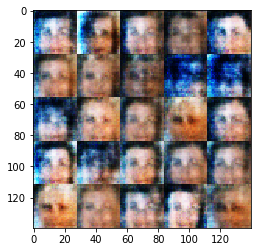

Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.4925... Generator Loss: 0.6541
Epoch 1/1... Discriminator Loss: 1.5892... Generator Loss: 0.7098
Epoch 1/1... Discriminator Loss: 1.4986... Generator Loss: 0.6390


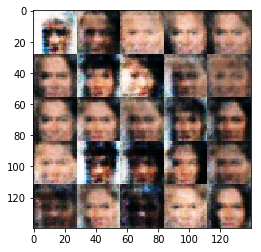

Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.4551... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 1.4712... Generator Loss: 0.6521


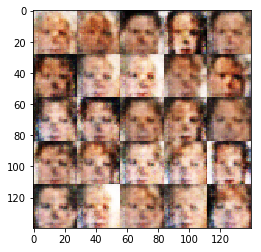

Epoch 1/1... Discriminator Loss: 1.4741... Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.4416... Generator Loss: 0.6278
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.4531... Generator Loss: 0.6615


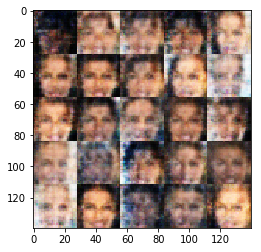

In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.